# Data Visualization, Plots, and Graphs

This document exists entirely for generating the visual elements for the paper and can safely be ignored when inspecting the project code.

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.misc import imread, imshow, imresize

plt.switch_backend('agg')

## Data Visualization

In [2]:

img_width, img_height = 224, 224
batch_size = 16
test_data_dir = '../data/test'
model_name = 'minnet'

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 12500 images belonging to 1 classes.


### Showing the Data Set

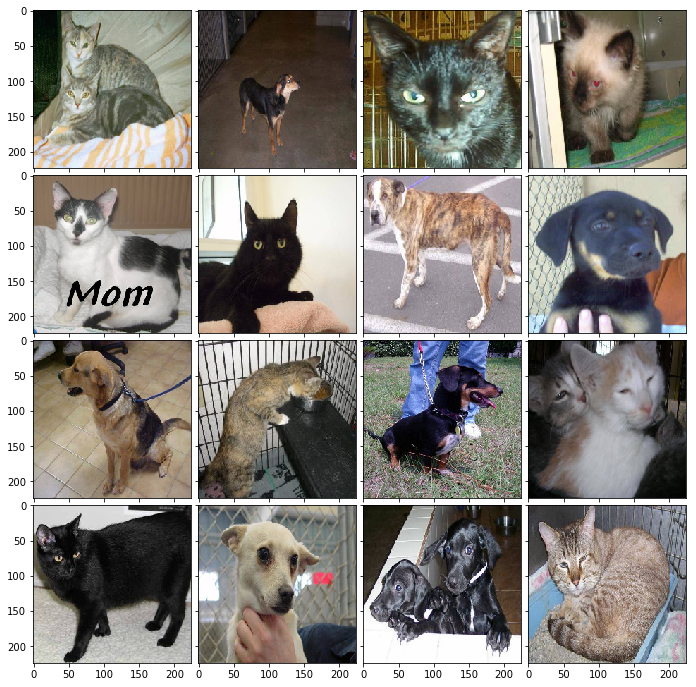

In [3]:
batch = test_generator.next()

imfig = plt.figure(1, (12., 12.))
grid = ImageGrid(imfig, 111, nrows_ncols=(4,4), axes_pad=0.1)

for i, img in enumerate(batch):
    grid[i].imshow(img)

plt.show()
imfig.savefig('../img/egdata.png')

## Accuracy and Loss Rate Graphs

### MinNet

In [4]:
minnet_data = pd.read_csv('../weights/minnet.csv')
minnet_data.describe()

epoch         acc        loss     val_acc    val_loss
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    49.500000    0.810261    0.402157    0.825334    0.384855
std     29.011492    0.068541    0.095634    0.065989    0.092750
min      0.000000    0.517090    0.286242    0.515121    0.264231
25%     24.750000    0.782593    0.330642    0.801194    0.319871
50%     49.500000    0.831299    0.375564    0.849085    0.350475
75%     74.250000    0.855103    0.450720    0.865473    0.435800
max     99.000000    0.882324    0.692091    0.892276    0.689436

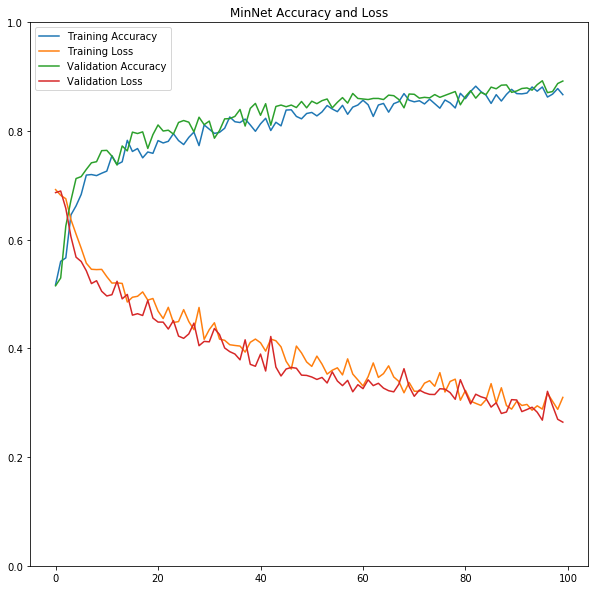

In [5]:
data = minnet_data
minfig = plt.figure(2, figsize=(10,10))

plt.subplot(111)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.val_loss, label="Validation Loss")
plt.title("MinNet Accuracy and Loss")
plt.ylim(0.0, 1.0)
plt.legend()

plt.show()
minfig.savefig("../img/minnet.png")

In [6]:
minnet_data.val_acc.max()

0.89227642276399999

In [7]:
minnet_data.val_loss.min()

0.26423148616999997

### ResNet

In [8]:
raw_resnet_data = pd.read_csv('../weights/raw_resnet.csv')
transfer_resnet_data = pd.read_csv('../weights/transfer_resnet.csv')

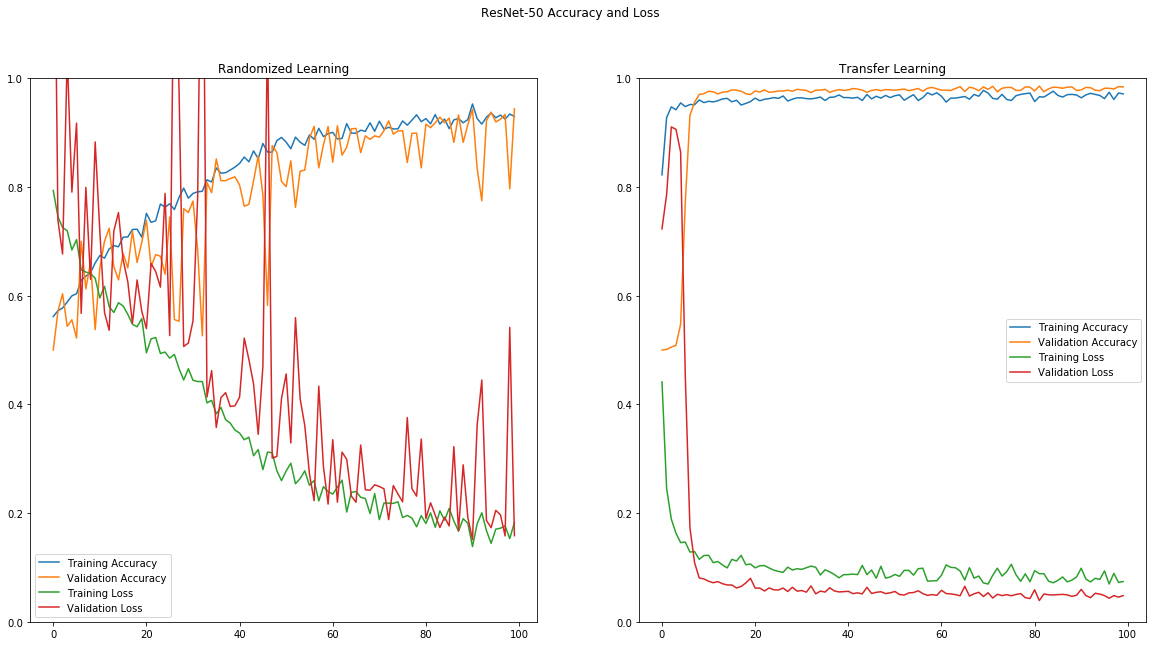

In [9]:
data = raw_resnet_data
resfig = plt.figure(3, figsize=(20,10))
plt.suptitle("ResNet-50 Accuracy and Loss")

plt.subplot(121)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Randomized Learning")

data = transfer_resnet_data

plt.subplot(122)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Transfer Learning")

plt.show()
resfig.savefig("../img/resnet.png")

In [10]:
[raw_resnet_data.val_acc.max(), transfer_resnet_data.val_acc.max()]

[0.94350000000000001, 0.98550000000000004]

In [11]:
[raw_resnet_data.val_loss.min(), transfer_resnet_data.val_loss.min()]

[0.15124576914999999, 0.039103520989000003]

### VGG-16

In [12]:
raw_vgg16_data = pd.read_csv('../weights/raw_vgg16.csv')
transfer_vgg16_data = pd.read_csv('../weights/transfer_vgg16.csv')

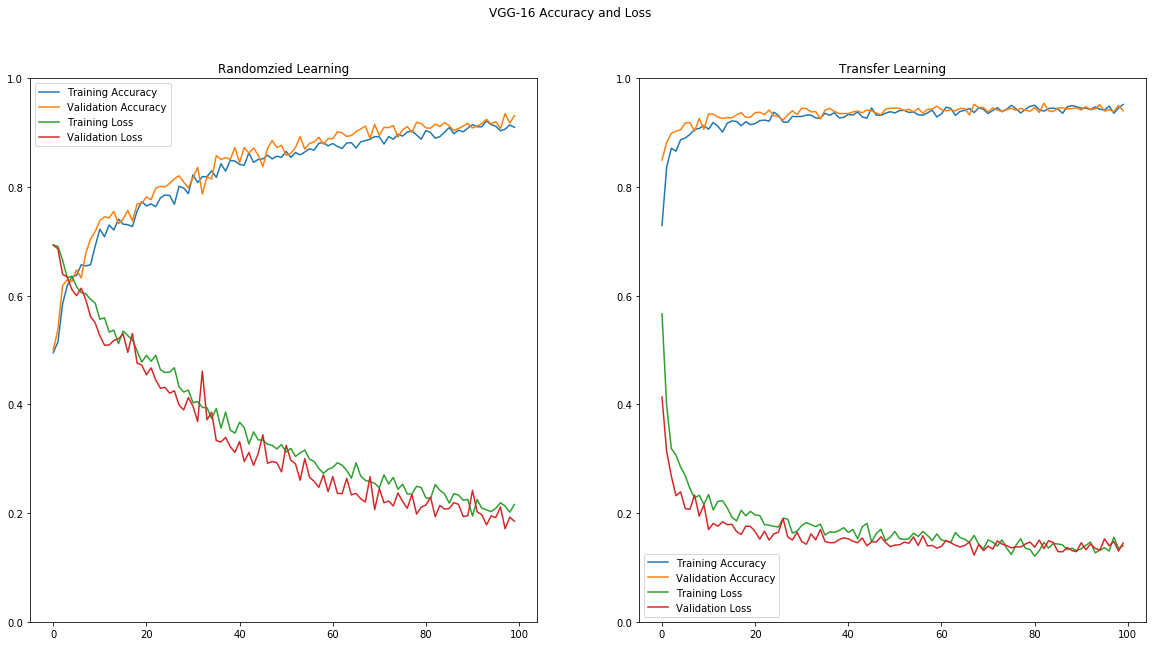

In [13]:
data = raw_vgg16_data
vggfig = plt.figure(4, figsize=(20,10))
plt.suptitle("VGG-16 Accuracy and Loss")

plt.subplot(121)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Randomzied Learning")

data = transfer_vgg16_data

plt.subplot(122)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Transfer Learning")

plt.show()
vggfig.savefig("../img/vgg16.png")

In [14]:
[raw_vgg16_data.val_acc.max(), transfer_vgg16_data.val_acc.max()]

[0.93500000000000005, 0.95400000000000007]

In [15]:
[raw_vgg16_data.val_loss.min(), transfer_vgg16_data.val_loss.min()]

[0.171297338873, 0.122589373641]

### Comparison of ResNet and VGG-16

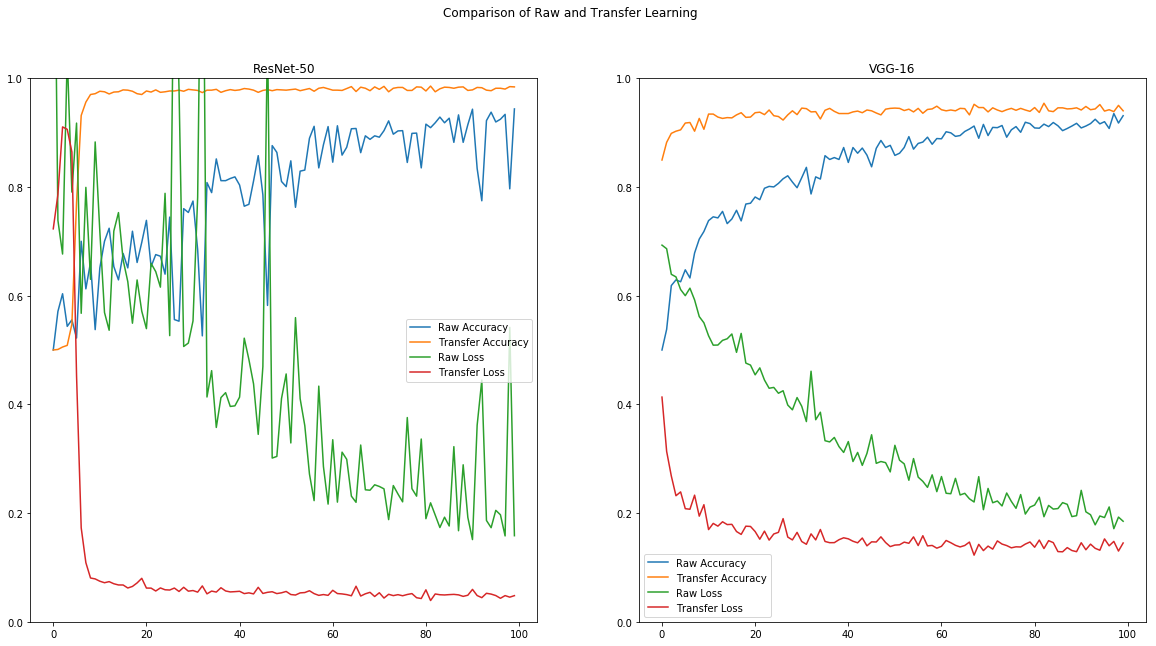

In [16]:
graphcompfig = plt.figure(5, figsize=(20,10))
plt.suptitle("Comparison of Raw and Transfer Learning")

plt.subplot(121)
plt.title("ResNet-50")
plt.plot(raw_resnet_data.val_acc, label="Raw Accuracy")
plt.plot(transfer_resnet_data.val_acc, label="Transfer Accuracy")
plt.plot(raw_resnet_data.val_loss, label="Raw Loss")
plt.plot(transfer_resnet_data.val_loss, label="Transfer Loss")
plt.ylim(0, 1.0)
plt.legend()

plt.subplot(122)
plt.title("VGG-16")
plt.plot(raw_vgg16_data.val_acc, label="Raw Accuracy")
plt.plot(transfer_vgg16_data.val_acc, label="Transfer Accuracy")
plt.plot(raw_vgg16_data.val_loss, label="Raw Loss")
plt.plot(transfer_vgg16_data.val_loss, label="Transfer Loss")
plt.ylim(0, 1.0)
plt.legend()

plt.show()
graphcompfig.savefig("../img/model_comparison_graph.png")

### Comparison of Raw vs. Transfer Learning

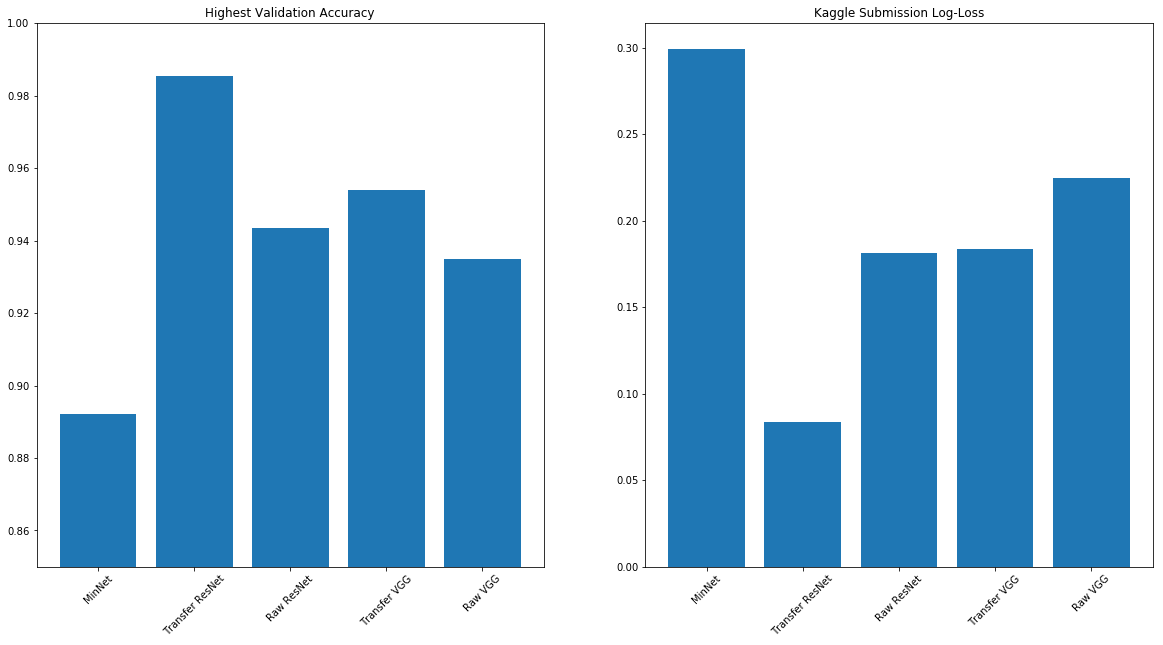

In [17]:
max_acc = [
    minnet_data.val_acc.max(),
    transfer_resnet_data.val_acc.max(),
    raw_resnet_data.val_acc.max(),
    transfer_vgg16_data.val_acc.max(),
    raw_vgg16_data.val_acc.max()
]

test_loss = [
    0.29924,
    0.08386,
    0.18124,
    0.18362,
    0.22483
]

models = ['MinNet', 'Transfer ResNet', 'Raw ResNet', 'Transfer VGG', 'Raw VGG']

barcompfig = plt.figure(6, figsize=(20., 10.))

plt.subplot(121)
plt.title("Highest Validation Accuracy")
plt.bar([1,2,3,4,5], max_acc, tick_label=models)
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)

plt.subplot(122)
plt.title("Kaggle Submission Log-Loss")
plt.bar([1,2,3,4,5], test_loss, tick_label=models)
plt.xticks(rotation=45)

plt.show()
barcompfig.savefig("../img/model_comparison_bar.png")

## Displaying Incorrectly Classified Images

In [18]:
model = 'transfer_resnet'

badfiles = []
with open(f"{model}_incorrect.txt", 'r') as f:
    for line in f:
        badfiles = [f"../data/validation/{line.rstrip()}" for line in f]

badfiles

['../data/validation/cats/cat.661.jpg',
 '../data/validation/cats/cat.258.jpg',
 '../data/validation/cats/cat.6.jpg',
 '../data/validation/cats/cat.245.jpg',
 '../data/validation/cats/cat.503.jpg',
 '../data/validation/cats/cat.724.jpg',
 '../data/validation/cats/cat.376.jpg',
 '../data/validation/cats/cat.587.jpg',
 '../data/validation/cats/cat.44.jpg',
 '../data/validation/cats/cat.369.jpg',
 '../data/validation/cats/cat.683.jpg',
 '../data/validation/cats/cat.45.jpg',
 '../data/validation/cats/cat.796.jpg',
 '../data/validation/cats/cat.19.jpg',
 '../data/validation/cats/cat.578.jpg',
 '../data/validation/cats/cat.689.jpg',
 '../data/validation/cats/cat.740.jpg',
 '../data/validation/cats/cat.757.jpg',
 '../data/validation/cats/cat.166.jpg',
 '../data/validation/dogs/dog.442.jpg',
 '../data/validation/dogs/dog.533.jpg',
 '../data/validation/dogs/dog.412.jpg',
 '../data/validation/dogs/dog.647.jpg',
 '../data/validation/dogs/dog.597.jpg',
 '../data/validation/dogs/dog.418.jpg',
 '../

In [19]:
len(badfiles)

39

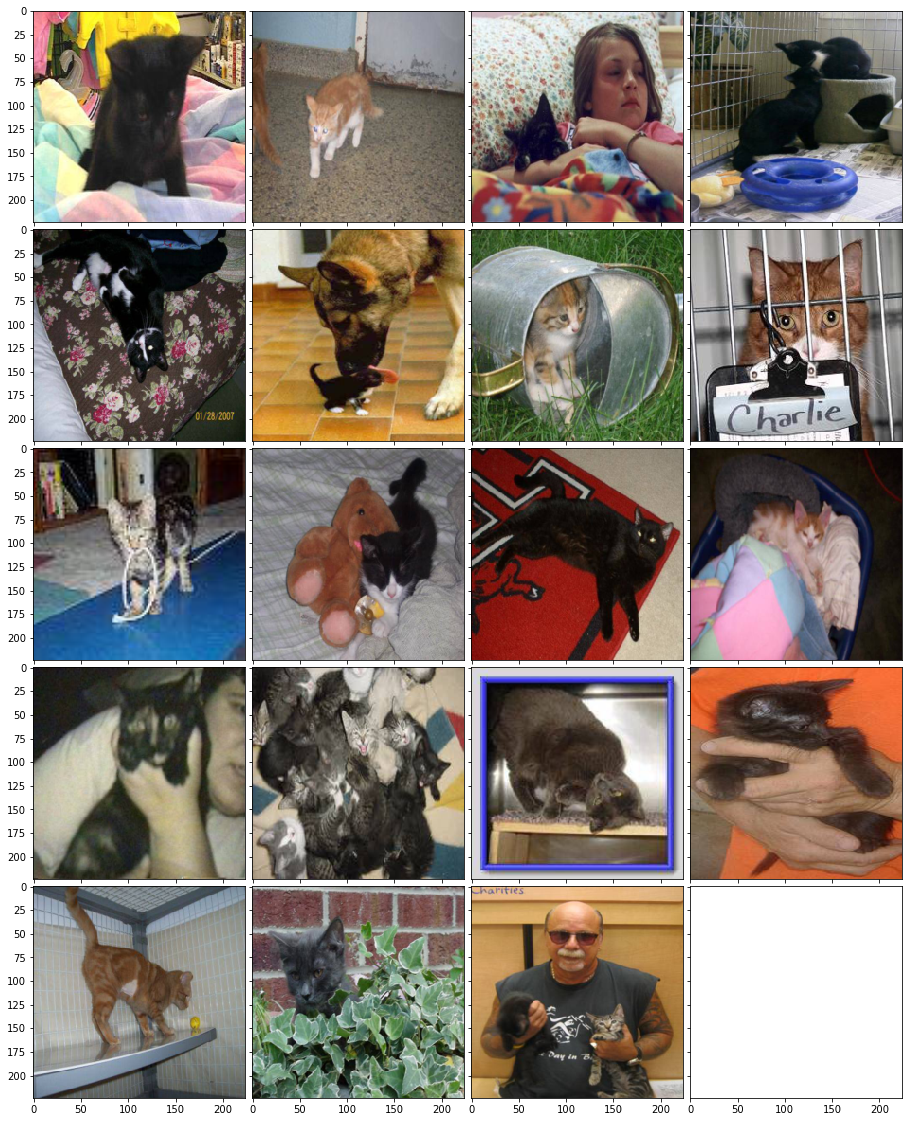

In [42]:
badfig1 = plt.figure(7, (20., 20.))
badgrid1 = ImageGrid(badfig1, 111, nrows_ncols=(5,4), axes_pad=0.1)

for i, img in enumerate(badfiles[:19]):
    badgrid1[i].imshow(imresize(imread(img), (224,224)))

plt.show()
badfig1.savefig('../img/incorrect1.png')

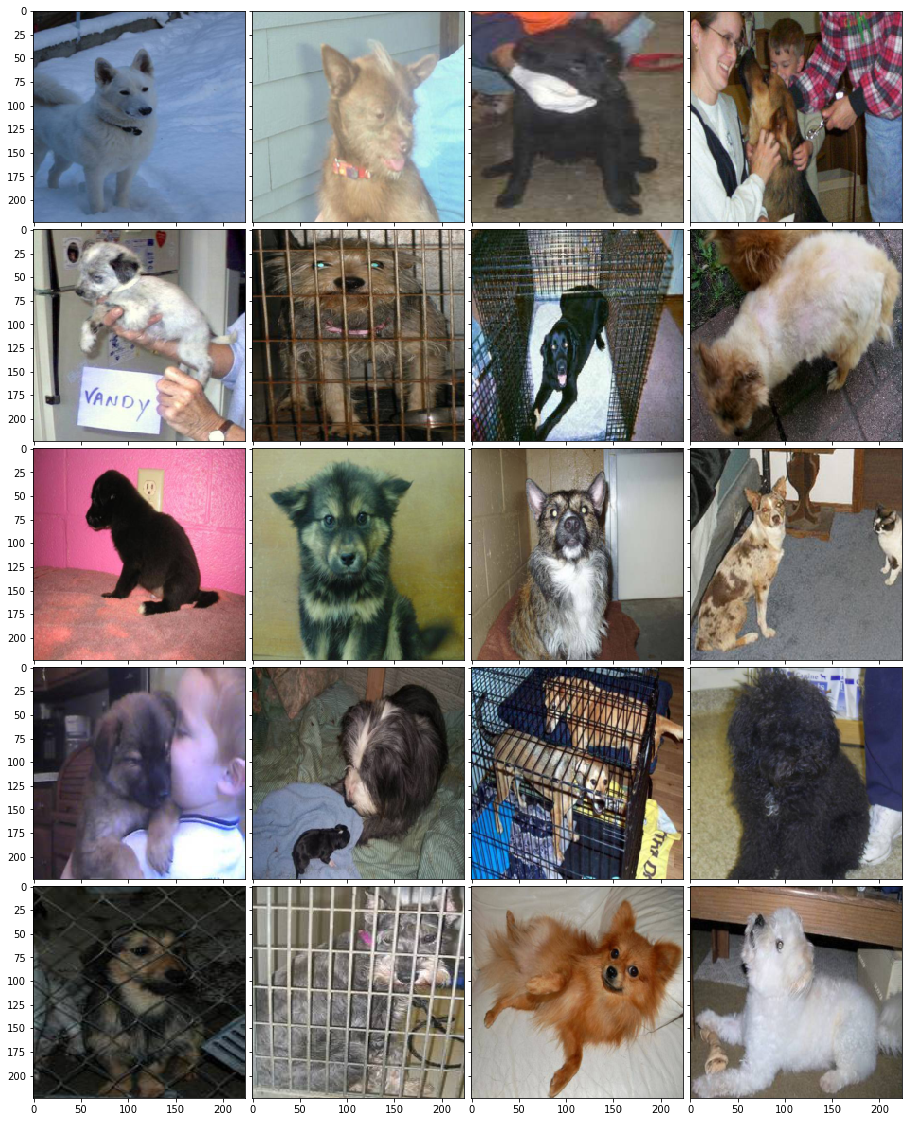

In [41]:
badfig2 = plt.figure(8, (20., 20.))
badgrid2 = ImageGrid(badfig2, 111, nrows_ncols=(5,4), axes_pad=0.1)

for i, img in enumerate(badfiles[19:]):
    badgrid2[i].imshow(imresize(imread(img), (224,224)))

plt.show()
badfig2.savefig('../img/incorrect2.png')